*Lab 8*



We will now deal with pseudo data, 
1. 
We will look at some high lum data first, we will focus on mass, two prong jet discriminant (2d) and KtDeltaR features as they are what we will be doing cuts on. Let’s start with some plots of the pseudo data overlaid with the simulated model data before cuts


In [43]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pandas as pd
import math
from scipy import optimize

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,3)

In [44]:
def cut(low,high,feature,signal,bkgd):
    bkgdDataCut =bkgd[ bkgd[feature]>low]
    bkgdDataCut=bkgdDataCut[bkgdDataCut[feature]<high]
    
    signalDatacut=signal[signal[feature]>low]
    signalDatacut=signalDatacut[signalDatacut[feature]<high]
    
    bkgdMean = 2000 * len(bkgdDataCut[feature])/len(qcdData[feature])
    
    signalMean = 50 * len(signalDatacut[feature])/len(higgsData[feature])
    
    p = (1-scipy.stats.poisson.cdf(bkgdMean+signalMean, bkgdMean))
    print('We get a simga significance of {0:1.3f} for a cut from {1:1.1f} to {2:1.1f}'.format(stats.norm.ppf(1-p),low,high))
    print('number of higgs signla left {0:1.1f}'.format(signalMean))
    print('number of background signla left {0:1.1f}'.format(bkgdMean))
    #print(signalMean)
    
    return(signalDatacut,bkgdDataCut)

def cut1(low,high,feature,signal):    
    signalDatacut=signal[signal[feature]>low]
    signalDatacut1=signalDatacut[signalDatacut[feature]<high]
    
    return(signalDatacut1)

In [45]:
# import library
import pickle

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)


higgsDataMod = pd.DataFrame(new_dict)
higgsData = pd.DataFrame(new_dict)
# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [46]:

# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
new_dict = pickle.load(infile)

qcdDataMod = pd.DataFrame(new_dict)
qcdData = pd.DataFrame(new_dict)

# list all keys of the files
new_dict.keys()

Index(['pt', 'eta', 'phi', 'mass', 'ee2', 'ee3', 'd2', 'angularity', 't1',
       't2', 't3', 't21', 't32', 'KtDeltaR'],
      dtype='object')

In [47]:
highLum=pd.read_hdf('data_highLumi_pt_1000_1200.h5')
lowLum=pd.read_hdf('data_lowLumi_pt_1000_1200.h5')

In [48]:
lowLum.shape

(442, 14)

In [49]:
highLum.shape

(4066, 14)

<function matplotlib.pyplot.show(*args, **kw)>

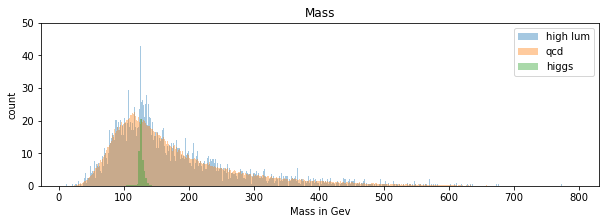

In [50]:

histHighLum , binsEdg=np.histogram(np.array(highLum['mass']), bins=500, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']),label ='high lum', width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])

histQcd , binsEdg=np.histogram(np.array(qcdData['mass']), bins=500, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']),label ='qcd', width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=50, density= False)
plt.bar(binsEdg[:-1],50*histHiggs/len(higgsData['mass']),label ='higgs', width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.legend()
plt.title('Mass')
plt.ylabel('count')
plt.xlabel('Mass in Gev')

plt.ylim([0,50])

plt.show

In [51]:
#histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=50, density= Fa

Text(0.5, 0, 'Two prong jet discriminant')

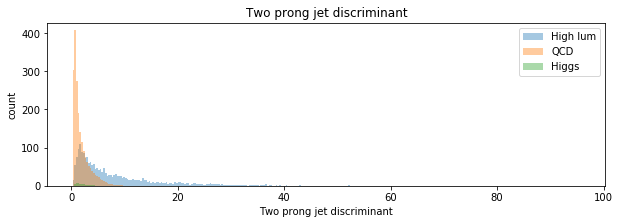

In [52]:

histHighLum , binsEdg=np.histogram(np.array(highLum['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='High lum')


histQcd , binsEdg1=np.histogram(np.array(qcdData['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='QCD')

histHiggs , binsEdg2=np.histogram(np.array(higgsData['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Higgs')

plt.legend()

plt.title('Two prong jet discriminant')
plt.ylabel('count')
plt.xlabel('Two prong jet discriminant')

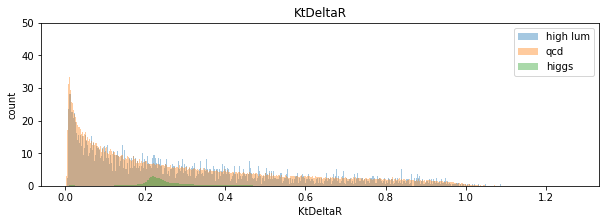

In [53]:
histHighLum , binsEdg=np.histogram(np.array(highLum['KtDeltaR']), bins=500, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['KtDeltaR']), label ='high lum',width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')

plt.ylim([0,50])

histQcd , binsEdg=np.histogram(np.array(qcdData['KtDeltaR']), bins=500, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['KtDeltaR']), label ='qcd',width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['KtDeltaR']), bins=200, density= False)
plt.bar(binsEdg[:-1],50 *histHiggs/len(higgsData['KtDeltaR']), label ='higgs',width=np.diff(binsEdg), align="edge",alpha=0.40)

plt.legend()

Now lets make some cuts, lets start with the mass cut and still overlay what we expect to see with the high lum run data

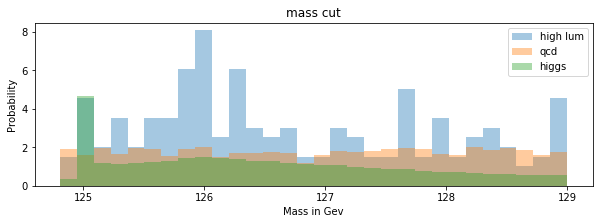

In [54]:
highLumMassCut=cut1(124.8,129,'mass',highLum)
histHighLum , binsEdg=np.histogram(np.array(highLumMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), label ='high lum',align="edge",alpha=0.40)
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataMassCut=cut1(124.8,129,'mass',qcdData)
histQcd , binsEdg1=np.histogram(np.array(qcdDataMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), label ='qcd',align="edge",alpha=0.40)

higgsDataMassCut=cut1(124.8,129,'mass',higgsData)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataMassCut['mass']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg),label ='higgs', align="edge",alpha=0.40)


plt.title('mass cut')
plt.ylabel('Probability')
plt.xlabel('Mass in Gev')

plt.legend()

Text(0.5, 0, 'Two prong jet discriminant')

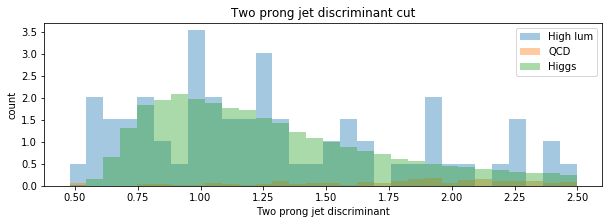

In [55]:
highLumCut2=cut1(0,2.5,'d2',highLumMassCut)
histHighLum , binsEdg=np.histogram(np.array(highLumCut2['d2']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='High lum')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut2=cut1(0,2.5,'d2',qcdDataMassCut)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut2['d2']), bins=30, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='QCD')

higgsDataCut2=cut1(0,2.5,'d2',higgsDataMassCut)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut2['d2']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Higgs')

plt.legend()

plt.title('Two prong jet discriminant cut')
plt.ylabel('count')
plt.xlabel('Two prong jet discriminant')
#higgsCut2,bkgdCut2=cut(0,2.5,'d2',higgsDataCut,qcdDataCut)



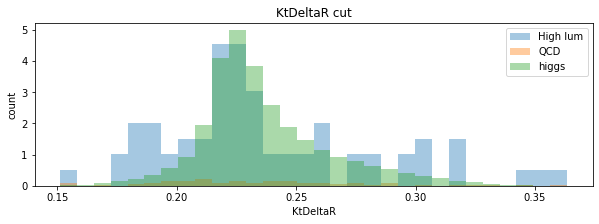

In [56]:
highLumCut3=cut1(0.1,0.7,'KtDeltaR',highLumCut2)
histHighLum , binsEdg=np.histogram(np.array(highLumCut3['KtDeltaR']), bins=30, density= False)
plt.bar(binsEdg[:-1], 2050*histHighLum/len(highLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='High lum')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut3=cut1(0.1,0.7,'KtDeltaR',qcdDataCut2)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut3['KtDeltaR']), bins=30, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='QCD')

higgsDataCut3=cut1(0.1,0.7,'KtDeltaR',higgsDataCut2)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut3['KtDeltaR']), bins=30, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='higgs')

plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR cut')

plt.legend()

#x=cut(0.1,0.7,'KtDeltaR',higgsCut2,bkgdCut2)



lets calculate our significance, it is important to note that we were able in lab 7 to get ridiculously good cuts, which we see in the inf signifigance since we are able to cut out all but 4 of the background signal out and have a reading of 68 of our high lum, so we can claim a deletion. This signal strength is a bit lower that what would be expected from the theory but not by a lot. 

In [57]:
bkgdMean = 4066 * len(qcdDataCut3)/len(qcdData)
    
signalMean = 4066 * len(highLumCut3)/len(highLum)
    
p = (1-scipy.stats.poisson.cdf(signalMean, bkgdMean))

print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))
print('number of high lum signal left after cuts {0:1.1f}'.format(signalMean))
print('number of expected background signal left after cuts {0:1.1f}'.format(bkgdMean))

We get a simga significance of inf
number of high lum signal left after cuts 68.0
number of expected background signal left after cuts 4.1



lets do the same with the low lum data

<function matplotlib.pyplot.show(*args, **kw)>

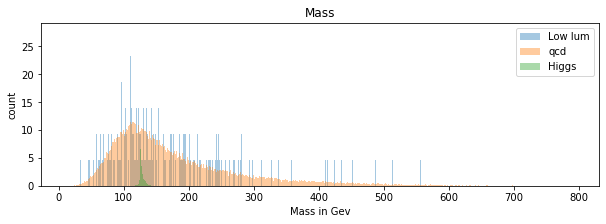

In [58]:
histLowLum , binsEdg=np.histogram(np.array(lowLum['mass']), bins=1000, density= False)
plt.bar(binsEdg[:-1], 2050*histLowLum/len(lowLum['mass']),label ='Low lum', width=np.diff(binsEdg), align="edge",alpha=0.40)
#plt.ylim([0,250])


histQcd , binsEdg=np.histogram(np.array(qcdData['mass']), bins=1000, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']),label ='qcd', width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['mass']), bins=200, density= False)
plt.bar(binsEdg[:-1],50*histHiggs/len(higgsData['mass']),label ='Higgs', width=np.diff(binsEdg), align="edge",alpha=0.40)

plt.title('Mass')
plt.ylabel('count')
plt.xlabel('Mass in Gev')

plt.legend()
plt.show


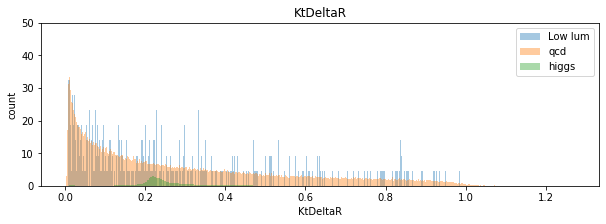

In [59]:
histLowLum , binsEdg=np.histogram(np.array(lowLum['KtDeltaR']), bins=500, density= False)
plt.bar(binsEdg[:-1], 2050*histLowLum/len(lowLum['KtDeltaR']), label ='Low lum',width=np.diff(binsEdg), align="edge",alpha=0.40)
plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('KtDeltaR')

plt.ylim([0,50])

histQcd , binsEdg=np.histogram(np.array(qcdData['KtDeltaR']), bins=500, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['KtDeltaR']), label ='qcd',width=np.diff(binsEdg), align="edge",alpha=0.40)

histHiggs , binsEdg=np.histogram(np.array(higgsData['KtDeltaR']), bins=200, density= False)
plt.bar(binsEdg[:-1],50 *histHiggs/len(higgsData['KtDeltaR']), label ='higgs',width=np.diff(binsEdg), align="edge",alpha=0.40)

plt.legend()

Text(0.5, 0, 'Two prong jet discriminant')

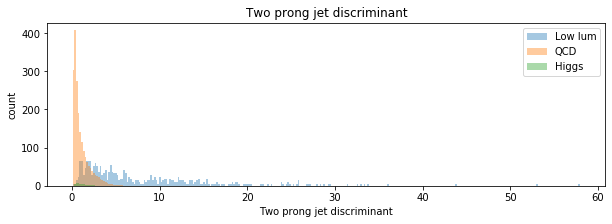

In [60]:
histlowLum , binsEdg=np.histogram(np.array(lowLum['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1], 2050*histlowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Low lum')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])

histQcd , binsEdg1=np.histogram(np.array(qcdData['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='QCD')

histHiggs , binsEdg2=np.histogram(np.array(higgsData['d2']), bins=300, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Higgs')

plt.legend()

plt.title('Two prong jet discriminant')
plt.ylabel('count')
plt.xlabel('Two prong jet discriminant')

Now lets do the same three cuts we did for the high lum and in lab 7

(2652, 14)

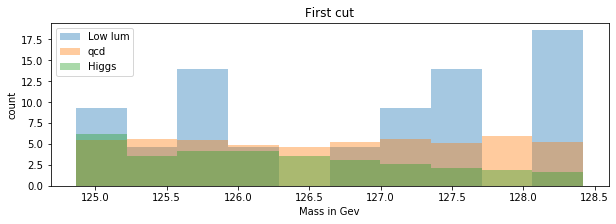

In [61]:
lowLumMassCut=cut1(124.8,129,'mass',lowLum)
histLowLum , binsEdg=np.histogram(np.array(lowLumMassCut['mass']), bins=10, density= False)
plt.bar(binsEdg[:-1], 2050*histLowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Low lum')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataMassCut=cut1(124.8,129,'mass',qcdData)
histQcd , binsEdg1=np.histogram(np.array(qcdDataMassCut['mass']), bins=10, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='qcd')

higgsDataMassCut=cut1(124.8,129,'mass',higgsData)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataMassCut['mass']), bins=10, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Higgs')

plt.title('First cut')
plt.ylabel('count')
plt.xlabel('Mass in Gev')

plt.legend()
sum(2000 *histQcd/len(qcdData['mass']))
qcdDataMassCut.shape

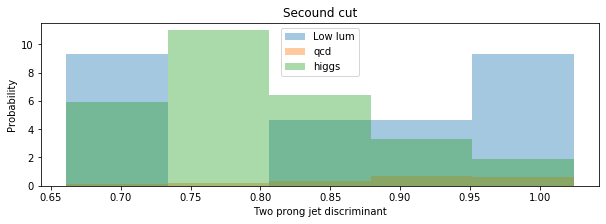

In [62]:
lowLumCut2=cut1(0,2.5,'d2',lowLumMassCut)
histlowLum , binsEdg=np.histogram(np.array(lowLumCut2['d2']), bins=5, density= False)
plt.bar(binsEdg[:-1], 2050*histlowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Low lum')
#plt.ylim([0,250])
plt.title('Secound cut')
plt.xlabel('Two prong jet discriminant')
#plt.xlim([0,20])
plt.ylabel('Probability')

#x = [5]*len(qcdData['mass'])
qcdDataCut2=cut1(0,2.5,'d2',qcdDataMassCut)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut2['d2']), bins=5, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='qcd')

higgsDataCut2=cut1(0,2.5,'d2',higgsDataMassCut)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut2['d2']), bins=5, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='higgs')

plt.legend()

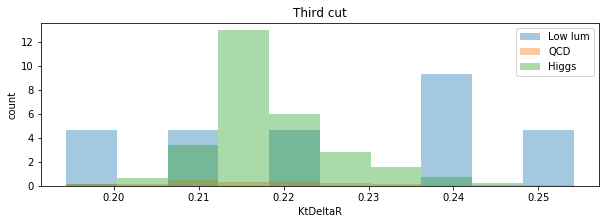

In [63]:
lowLumCut3=cut1(0.1,0.7,'KtDeltaR',lowLumCut2)
histlowLum , binsEdg=np.histogram(np.array(lowLumCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1], 2050*histlowLum/len(lowLum['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Low lum')
#plt.ylim([0,250])

#x = [5]*len(qcdData['mass'])
qcdDataCut3=cut1(0.1,0.7,'KtDeltaR',qcdDataCut2)
histQcd , binsEdg1=np.histogram(np.array(qcdDataCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1],2000 *histQcd/len(qcdData['mass']), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='QCD')

higgsDataCut3=cut1(0.1,0.7,'KtDeltaR',higgsDataCut2)
histHiggs , binsEdg2=np.histogram(np.array(higgsDataCut3['KtDeltaR']), bins=10, density= False)
plt.bar(binsEdg[:-1],(50*histHiggs/len(higgsData['mass'])), width=np.diff(binsEdg), align="edge",alpha=0.40,label ='Higgs')

plt.ylabel('count')
plt.xlabel('KtDeltaR')
plt.title('Third cut')

plt.legend()



In [64]:
bkgdMean = 442 * len(qcdDataCut3)/len(qcdData)
    
signalMean = 442 * len(lowLumCut3)/len(lowLum)


    
p = (1-scipy.stats.poisson.cdf(signalMean, bkgdMean))

print('We get a simga significance of {0:1.3f}'.format(stats.norm.ppf(1-p)))
print('number of low run signal left after cuts {0:1.1f}'.format(signalMean))
print('number expected signal for just the background after cut {0:1.4f}'.format(bkgdMean))

We get a simga significance of 4.915
number of low run signal left after cuts 6.0
number expected signal for just the background after cut 0.4420


We don’t quite get a five sigma significance we need but we do get a signal that can be considered a strong candidate, this is expected of a smaller run, as runs get larger (more practical counts) we expect to get a higher significance. One thing to note is when calculating the significance we are normalizing the background to the size of the low lum run, this means we expect to see no higgs signal and then after cuts we show what is the probability that a signal free background producing a signal concentration in the manifold where we expect the higgs to be, this make the significance higher that what we would have seen if we would have expected to have seen higgs, so either way we cannot clam a discovery.



In [65]:
x = 442 * len(higgsDataCut3)/len(higgsData)
x/40

6.2933065

So lets find the 95% upper limit, To state the question we want to know what signal strength would have resulted in a observed single that was stronger than what we saw, we will do this for both our observed low lum data as well as our modeled higgs data. So, lets start with injections into the background. One thing to note is that we are doing this for the data after having done cuts to it, hence when we are injecting signal where we expect it have survived the cuts, this introduces a bias or more that we are only testing for the upper limit of seeing signal that looks like what the theory and simulations would predict, this mean that we will have to also take into account that our cuts removes about half the signal. 

The data is of random independent events so we will assume a Poisson distribution 



In [66]:
bkgd=scipy.stats.poisson.rvs(0.442, loc=0, size=100000)
#plt.hist(bkgd, density=True,bins=5)
#plt.yscale('log')
#plt.xlabel('Number of successes')
#plt.ylabel('Probability')
#plt.title('background')
#plt.legend()
#plt.show

In [67]:
p = stats.norm.cdf(5)

#print('We get a five sigma sensitivity threshold at a signal strength of {0:1.0f} for this background'.format(stats.poisson.ppf(p,0.44)))

In [68]:
bkgd=scipy.stats.poisson.rvs(0.44, loc=0, size=1000000)
signal=np.random.uniform(low=0.0, high=20, size=(1000000))
data = bkgd + signal


singaledges = np.linspace(-0.5,20.5,21)
dataeges = np.linspace(-0.5,20.5,21)
datacenters = (dataeges[:-1]+dataeges[1:])/2
signalcenters = (singaledges[:-1]+singaledges[1:])/2

In [69]:
Psd, temp, temp2 =np.histogram2d(data,signal,bins=[dataeges,singaledges],density=True)

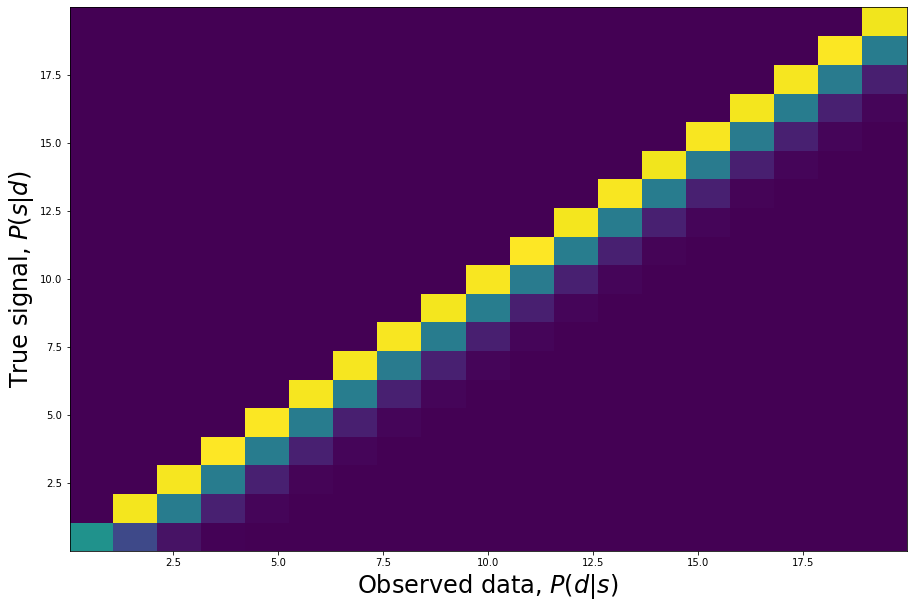

In [70]:
plt.rcParams["figure.figsize"] = (15,10)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)

slices = pd.DataFrame(Psd)

In [71]:
for i in range(0,20):
    obsSig=slices[i]
    #datacenters[index[0][0]]
    norObsSig= obsSig/np.sum(obsSig)
    if np.sum(norObsSig[0:7]) <0.05:
        print(i)
        break

7


We saw a singal strength of 6 events after the cuts, this gives us a 95% upper limit of a signal strength of 7 after the cuts. We get this number by integrating horizontal lines of the 2d graph above up to the seen signal and when that is less than 0.05 the signal strength corresponding to that horizontal line is our 95% upper limit

now lets do the same for what the theory would predict. It just so happen that higgs model gives us a expect single strength of 6.2 this will give us the same answer as above but we will still do the same procedure

In [72]:
bkgd=scipy.stats.poisson.rvs(0.44, loc=0, size=1000000)
signal=np.random.uniform(low=0.0, high=20, size=(1000000))
data = bkgd + signal


singaledges = np.linspace(-0.5,20.5,21)
dataeges = np.linspace(-0.5,20.5,21)
datacenters = (dataeges[:-1]+dataeges[1:])/2
signalcenters = (singaledges[:-1]+singaledges[1:])/2
Psd, temp, temp2 =np.histogram2d(data,signal,bins=[dataeges,singaledges],density=True)

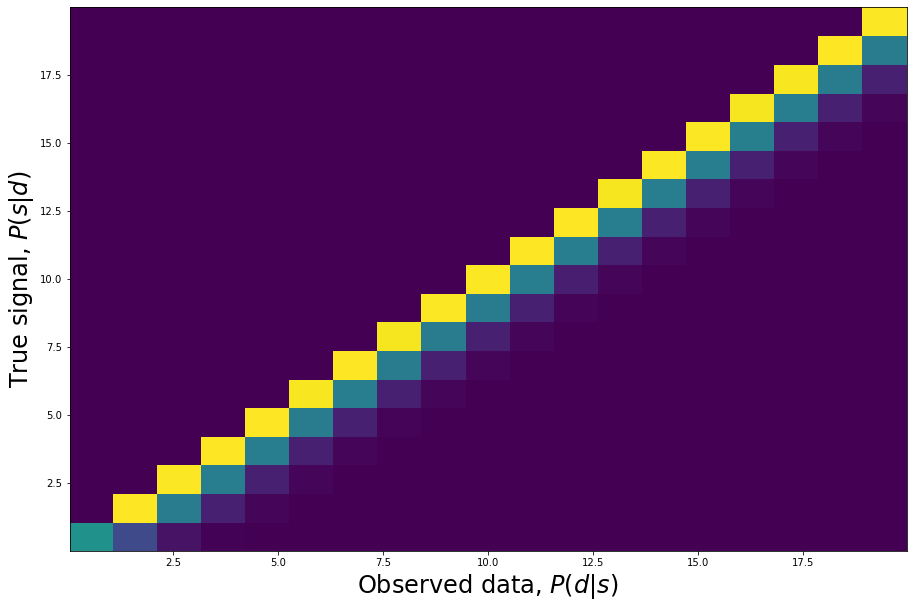

In [73]:
plt.rcParams["figure.figsize"] = (15,10)
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)
#cax = plt.axes([0.85, 0.1, 0.075, 0.8])
#plt.colorbar(cax=cax)


slices = pd.DataFrame(Psd)

In [74]:
slices = pd.DataFrame(Psd)
values=datacenters.round()

#plt.plot(signalcenters,slices.loc[index[0][0]])
obsSig=slices[0]
#datacenters[index[0][0]]
norObsSig= obsSig/np.sum(obsSig)


In [75]:
for i in range(0,20):
    obsSig=slices[i]
    #datacenters[index[0][0]]
    norObsSig= obsSig/np.sum(obsSig)
    if np.sum(norObsSig[0:7]) <0.05:
        print(i)
        break

7



as expected we have the same result as the low lum run this is promising for the theory model and for the observed candidate that that low lum run observed since we have a match between the expected and observed signals
